In [1]:
from bauer.models import FlexibleSDRiskRegressionModel, FlexibleSDRiskModel, FlexibleSDRiskRegressionModel

from riskeye.utils.data import get_all_behavior, get_all_eyepos_info
import seaborn as sns

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from riskeye.cogmodels.fit_model import get_data
from patsy import dmatrix

In [3]:
df = get_data(model_label='23')

In [4]:
dmatrix('risky_duration_prop*saw_risky_first11 * exptype:saw_risky_first11 + exptype:risky_duration_prop + exptype:risky_duration_prop:saw_risky_first11 - 1', df)

DesignMatrix with shape (28132, 6)
  Columns:
    ['risky_duration_prop',
     'exptype[T.symbolic]:risky_duration_prop',
     'saw_risky_first11',
     'exptype[T.symbolic]:saw_risky_first11',
     'risky_duration_prop:saw_risky_first11',
     'risky_duration_prop:exptype[T.symbolic]:saw_risky_first11']
  Terms:
    'risky_duration_prop' (column 0)
    'exptype:risky_duration_prop' (column 1)
    'saw_risky_first11' (column 2)
    'exptype:saw_risky_first11' (column 3)
    'risky_duration_prop:saw_risky_first11' (column 4)
    'risky_duration_prop:exptype:saw_risky_first11' (column 5)
  (to view full data, use np.asarray(this_obj))

In [5]:
dmatrix('risky_duration_prop*saw_risky_first11*exptype -1 - exptype', df)

DesignMatrix with shape (28132, 6)
  Columns:
    ['risky_duration_prop',
     'risky_duration_prop:exptype[T.symbolic]',
     'saw_risky_first11',
     'saw_risky_first11:exptype[T.symbolic]',
     'risky_duration_prop:saw_risky_first11',
     'risky_duration_prop:saw_risky_first11:exptype[T.symbolic]']
  Terms:
    'risky_duration_prop' (column 0)
    'risky_duration_prop:exptype' (column 1)
    'saw_risky_first11' (column 2)
    'saw_risky_first11:exptype' (column 3)
    'risky_duration_prop:saw_risky_first11' (column 4)
    'risky_duration_prop:saw_risky_first11:exptype' (column 5)
  (to view full data, use np.asarray(this_obj))

In [10]:
dmatrix('left_duration_prop*saw_left_first - 1 + exptype:left_duration_prop + exptype:left_duration_prop:saw_left_first', df)

DesignMatrix with shape (28132, 6)
  Columns:
    ['saw_left_first[False]',
     'saw_left_first[True]',
     'left_duration_prop',
     'left_duration_prop:saw_left_first[T.True]',
     'exptype[T.symbolic]:left_duration_prop',
     'exptype[T.symbolic]:left_duration_prop:saw_left_first[T.True]']
  Terms:
    'saw_left_first' (columns 0:2)
    'left_duration_prop' (column 2)
    'left_duration_prop:saw_left_first' (column 3)
    'exptype:left_duration_prop' (column 4)
    'exptype:left_duration_prop:saw_left_first' (column 5)
  (to view full data, use np.asarray(this_obj))

In [23]:
df = get_all_behavior()
eyepos = get_all_eyepos_info(source='eyepos', summarize=True)
df = df.join(eyepos)

In [24]:
df['n1'], df['n2'] = df['n_left'], df['n_right']
df['p1'], df['p2'] = df['p_left'], df['p_right']
df['choice'] = df['leftRight'] == -1

In [25]:
df['ev1'] = df['p1'] * df['n1']
df['ev2'] = df['p2'] * df['n2']

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_69350/661146303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lmplot(df.groupby(['subject', 'ev1', 'exptype']).mean().reset_index(), x='ev1', y='choice', logistic=True, hue='exptype', scatter=False)


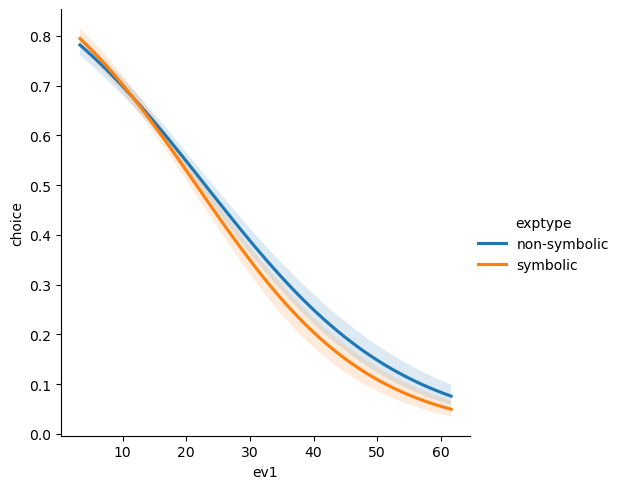

In [28]:
sns.lmplot(df.groupby(['subject', 'ev1', 'exptype']).mean().reset_index(), x='ev1', y='choice', logistic=True, hue='exptype', scatter=False)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_69350/3258649340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lmplot(df.groupby(['subject', 'ev2', 'exptype']).mean().reset_index(), x='ev2', y='choice', logistic=True, hue='exptype', scatter=False)


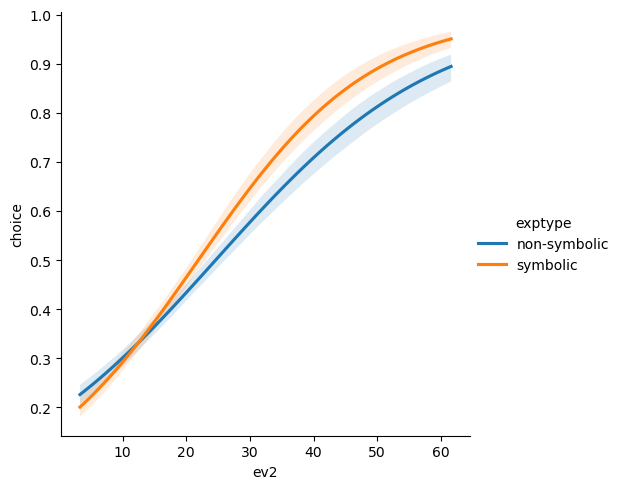

In [29]:
sns.lmplot(df.groupby(['subject', 'ev2', 'exptype']).mean().reset_index(), x='ev2', y='choice', logistic=True, hue='exptype', scatter=False)

In [33]:
df

accuracy     rt  leftRight  \
subject run block trial exptype      n_saccades                               
01      1   1     1     symbolic     6                  1  1.215          1   
                  2     symbolic     3                  1  0.737         -1   
                  3     symbolic     2                  1  0.920         -1   
                  4     symbolic     1                  1  0.965         -1   
                  5     symbolic     1                  1  1.218          1   
...                                                   ...    ...        ...   
64      5   2     20    non-symbolic 2                  1  0.674          1   
                  21    non-symbolic 2                  0  0.915          1   
                  22    non-symbolic 2                  1  0.669          1   
                  23    non-symbolic 2                  1  0.822         -1   
                  24    non-symbolic 2                  1  1.015          1   

                                                 pressedKey  n_safe  n_risky  \
subject run block trial exptype      n_saccades                                
01      1   1     1     symbolic     6                   75      14       47   
                  2     symbolic     3                   77       5        6   
                  3     symbolic     2                   77      14       17   
                  4     symbolic     1                   77      10       12   
                  5     symbolic     1                   75      14       28   
...                                                     ...     ...      ...   
64      5   2     20    non-symbolic 2                   75      14       15   
                  21    non-symbolic 2                   75       5       12   
                  22    non-symbolic 2                   75      10       12   
                  23    non-symbolic 2                   77       5       20   
                  24    non-symbolic 2                   75      20       22   

                                                 constSide  correct_perm  \
subject run block trial exptype      n_saccades                            
01      1   1     1     symbolic     6                   0            -1   
                  2     symbolic     3                   0             1   
                  3     symbolic     2                   0             1   
                  4     symbolic     1                   0             1   
                  5     symbolic     1                   0            -1   
...                                                    ...           ...   
64      5   2     20    non-symbolic 2                   0             1   
                  21    non-symbolic 2                   0            -1   
                  22    non-symbolic 2                   0             1   
                  23    non-symbolic 2                   0            -1   
                  24    non-symbolic 2                   0             1   

                                                 reset    onset  ...  \
subject run block trial exptype      n_saccades                  ...   
01      1   1     1     symbolic     6              -1    6.065  ...   
                  2     symbolic     3              -1   11.708  ...   
                  3     symbolic     2              -1   17.284  ...   
                  4     symbolic     1              -1   22.882  ...   
                  5     symbolic     1              -1   28.471  ...   
...                                                ...      ...  ...   
64      5   2     20    non-symbolic 2               1  248.035  ...   
                  21    non-symbolic 2               1  253.570  ...   
                  22    non-symbolic 2               1  259.087  ...   
                  23    non-symbolic 2               1  264.623  ...   
                  24    non-symbolic 2               1  270.161  ...   

                                                 left_

In [34]:
model = FlexibleSDRiskRegressionModel(df.reset_index('exptype'), regressors={'n1_evidence_sd_poly0':'exptype',
                                'n1_evidence_sd_poly1':'exptype',
                                'n1_evidence_sd_poly2':'exptype',
                                'n1_evidence_sd_poly3':'exptype',
                                'n1_evidence_sd_poly4':'exptype',
                                'n2_evidence_sd_poly0':'exptype',
                                'n2_evidence_sd_poly1':'exptype',
                                'n2_evidence_sd_poly2':'exptype',
                                'n2_evidence_sd_poly3':'exptype',
                                'n2_evidence_sd_poly4':'exptype',}, 
                                prior_estimate='full', polynomial_order=5, bspline=True)
model.build_estimation_model()
idata = model.sample(100, 100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [risky_prior_mu_mu, risky_prior_mu_sd, risky_prior_mu_offset, risky_prior_std_mu, risky_prior_std_sd, risky_prior_std_offset, safe_prior_mu_mu, safe_prior_mu_sd, safe_prior_mu_offset, safe_prior_std_mu, safe_prior_std_sd, safe_prior_std_offset, n1_evidence_sd_poly0_mu, n1_evidence_sd_poly0_sd, n1_evidence_sd_poly0_offset, n1_evidence_sd_poly1_mu, n1_evidence_sd_poly1_sd, n1_evidence_sd_poly1_offset, n1_evidence_sd_poly2_mu, n1_evidence_sd_poly2_sd, n1_evidence_sd_poly2_offset, n1_evidence_sd_poly3_mu, n1_evidence_sd_poly3_sd, n1_evidence_sd_poly3_offset, n1_evidence_sd_poly4_mu, n1_evidence_sd_poly4_sd, n1_evidence_sd_poly4_offset, n2_evidence_sd_poly0_mu, n2_evidence_sd_poly0_sd, n2_evidence_sd_poly0_offset, n2_evidence_sd_poly1_mu, n2_evidence_sd_poly1_sd, n2_evidence_sd_poly1_offset, n2_evidence_sd_poly2_mu, n2_evidence_sd_poly2_sd, 

Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 5978 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 138 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [39]:
idata.posterior.to_dataframe()

: 

In [35]:
curves = FlexibleSDRiskModel.get_sd_curve(model, idata)

curve_stats = FlexibleSDRiskModel.get_sd_curve_stats(curves)
curve_stats

yo1


sd        hdi025    hdi975
x          variable                                  
5.000000   n1        2.098525  2.249378e-07  8.937136
           n2        2.105272  6.421271e-08  7.571054
6.080808   n1        2.133615  2.673240e-07  8.898386
           n2        2.138859  7.670385e-08  7.535643
7.161616   n1        2.169981  3.162489e-07  8.858981
...                       ...           ...       ...
109.838384 n2        4.161206  2.940291e-05  9.204254
110.919192 n1        4.236677  1.232017e-04  9.687880
           n2        4.207485  3.110204e-05  9.221542
112.000000 n1        4.287883  1.282755e-04  9.900023
           n2        4.256247  3.297012e-05  9.484160

[200 rows x 3 columns]

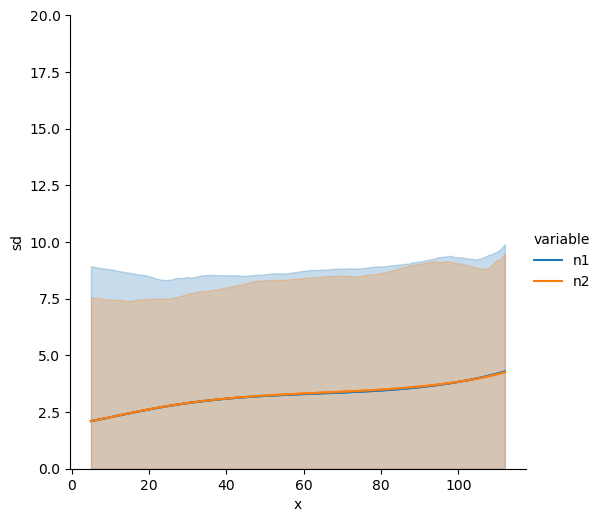

In [36]:

FlexibleSDRiskModel.plot_sd_curve_stats(curve_stats).add_legend()

In [32]:
FlexibleSDRiskModel.get_sd_curve_statss

Signature: FlexibleSDRiskModel.get_sd_curve_stats(n_sd, groupby=[])
Docstring: <no docstring>
File:      ~/git/bauer/bauer/models.py
Type:      function